# Dataset Preprocessing and Loading

This notebook demonstrates how to extract the default dataset given using functions in `dataset.py`

In [1]:
%load_ext autoreload
%autoreload 2

from descriptor import *
from dataset import *
from template import *
from matplotlib import pyplot as plt
import os
import cv2
import pickle

## Extract Annotations

Annotations include metadata on the dataset, such as the bounding boxes of ground truths, pose and classification status
<br>**provided_annots** are annnotation given by TA</br>
<br>**extra_annots** are additional annotations we added</br>

In [8]:
curr_wd = os.getcwd()
annot_source_path = os.path.join(curr_wd, 'cache_anno', 'classification')
annot_source_path_provided = os.path.join(annot_source_path, 'provided_annots.pkl')
annot_source_path_extra = os.path.join(annot_source_path, 'extra_annots.pkl')

# Extract Annotations if file does not exist
# NOTE: Delete existing .pkl files before running is recommended
extract_provided_annots()
extract_extra_annots()

In [9]:
# Load annotations
with open(annot_source_path_provided, 'rb') as f:
    provided_annots = pickle.load(f)

with open(annot_source_path_extra, 'rb') as f:
    extra_annots = pickle.load(f)
    
extra_annots # Display format

{'000.jpg': [[[739, 4924, 861, 5086], ['wenda', 'face', 'front']],
  [[7940, 6288, 8050, 6438], ['other', 'face', 'front']],
  [[7932, 6057, 8050, 6207], ['other', 'face', 'front']],
  [[9710, 6109, 9816, 6271], ['other', 'face', 'front']],
  [[8017, 4291, 8102, 4457], ['other', 'face', 'front']],
  [[9588, 3954, 9689, 4149], ['waldo', 'face', 'front']],
  [[7506, 861, 7607, 995], ['other', 'face', 'front']],
  [[9048, 5549, 9166, 5728], ['other', 'face', 'front']],
  [[6663, 6626, 6796, 6795], ['other', 'face', 'front']],
  [[9109, 2484, 9210, 2642], ['other', 'face', 'front']],
  [[9764, 1666, 9861, 1820], ['other', 'face', 'front']],
  [[3514, 3743, 3619, 3889], ['other', 'face', 'front']],
  [[1997, 4604, 2143, 4755], ['other', 'face', 'front']],
  [[977, 5139, 1112, 5301], ['other', 'face', 'front']],
  [[7481, 2332, 7611, 2483], ['other', 'face', 'front']],
  [[8647, 5597, 8798, 5770], ['other', 'face', 'front']],
  [[3287, 5144, 3400, 5263], ['other', 'face', 'front']]],
 '019.j

## Extract Window Patches

We extract each bounding box of Waldo as a window, for which we can extract features from using interest point descriptors

In [4]:
# Extract windows for both train and validation
patch_source_path = os.path.join(curr_wd, 'datasets', 'classification')

# load all annotated patches
# here we just load random patches from all images for negative examples
img_lst = []
img_lst_pth = os.path.join(curr_wd, 'datasets', 'ImageSets', 'images.txt')
with open(img_lst_pth, 'r') as fp:
    contents = fp.readlines()
    for l in contents:
        file_name = l.strip()
        if file_name:
            img_lst.append(file_name)

prepare_classification_dataset(img_lst)

## Loading Dataset

In [5]:
import matplotlib.pyplot as plt
def check_loader(loader, title):
    fig, axes = plt.subplots(nrows=1, ncols=8)
    fig.suptitle(title, y=0.35)
    fig.set_size_inches(18.5, 10.5)
    for i in range(8):
        axes[i].axis('off')
        im, gt = next(loader)
        img = im[:, :, ::-1]
        axes[i].imshow(img)
        axes[i].set_title(gt)

---num of training instances: 1656
---num of validation instances: 414


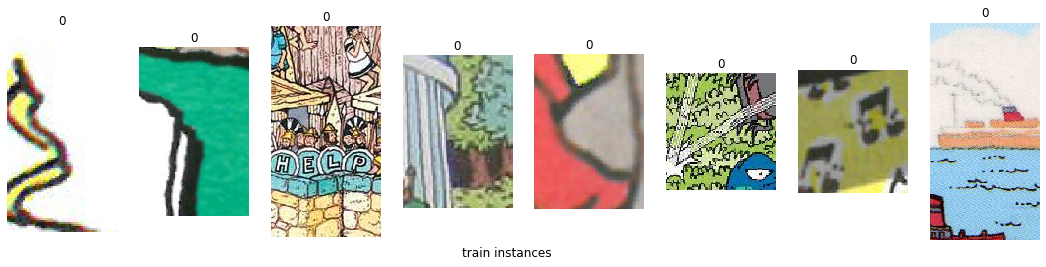

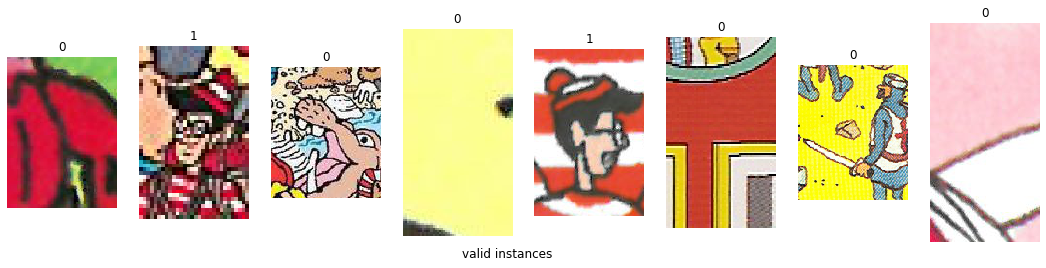

In [7]:
# create dataloader for the simplest waldo binary classification
# 'simple' means we only use random patches as example
# we only use 80 percent of these negative examples
taxonomy = ['waldo_face_front']
train_loader, valid_loader = prepare_classification_dataloader(taxonomy, neg_ratio=0.7)
check_loader(train_loader, 'train instances')
check_loader(valid_loader, 'valid instances')

### Python Module

On first loading the project directory, please run the below function to preprocess and load the necessary data. If a fresh preprocessing is required, set the `clean` parameter to `True`. If the below code block has issues, run the above code blocks in sequence.

In [ ]:
prepare_dataset(clean=False)
# NOTE: If cache anno has a default file, either remove it then run this function, or set clean to be true